# Quick Guide to Facebook's Prophet Basics
---
---

## IMPORTANT NOTE ONE:

**You should really read the papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**

Link to paper: https://peerj.com/preprints/3190.pdf
---
---

## IMPORTANT NOTE TWO:

-----
------

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 
    * SCROLL DOWN UNTIL YOU SEE THE ANACONDA OPTION AT THE BOTTOM OF THE PAGE.
    * YOU NEED TO INSTALL BOTH **conda install gcc** and **conda install -c conda-forge fbprophet**

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.tail()

,date,beer
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


In [5]:
df.shape

(324, 2)

In [6]:
df.columns = ['ds','y']

In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


### Create and Fit Model

In [9]:
m = Prophet()

In [10]:
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


###  Forcasting

In [13]:
future = m.make_future_dataframe(periods=24, freq='MS')

In [14]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [17]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [18]:
len(df)

324

In [19]:
len(future)

348

In [20]:
forcast = m.predict(future)

In [21]:
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1778.389678,1156.041152,1474.894701,1778.389678,1778.389678,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,0.0,0.0,0.0,1316.488218
1,1992-02-01,1780.987184,1190.741803,1517.339932,1780.987184,1780.987184,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,0.0,0.0,0.0,1353.062229
2,1992-03-01,1783.417109,1444.644808,1777.545869,1783.417109,1783.417109,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,0.0,0.0,0.0,1603.739371
3,1992-04-01,1786.014616,1410.983077,1752.167108,1786.014616,1786.014616,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,0.0,0.0,0.0,1589.923135
4,1992-05-01,1788.528331,1656.190850,1990.343021,1788.528331,1788.528331,45.713009,45.713009,45.713009,45.713009,45.713009,45.713009,0.0,0.0,0.0,1834.241340


In [22]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5204.920380,5091.694602,5413.606671,5192.974889,5216.527043,40.765082,40.765082,40.765082,40.765082,40.765082,40.765082,0.0,0.0,0.0,5245.685462
344,2020-09-01,5221.075787,4920.394821,5253.545605,5208.204992,5233.544609,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,-132.510619,0.0,0.0,0.0,5088.565168
345,2020-10-01,5236.710051,5035.470086,5361.337323,5222.544115,5250.669538,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,-43.280888,0.0,0.0,0.0,5193.429163
346,2020-11-01,5252.865458,5174.930521,5506.489965,5237.701101,5267.596931,87.236362,87.236362,87.236362,87.236362,87.236362,87.236362,0.0,0.0,0.0,5340.101820
347,2020-12-01,5268.499722,6176.474359,6516.656038,5252.262999,5284.637650,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,1071.594904,0.0,0.0,0.0,6340.094626


In [23]:
forcast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [24]:
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4632.015644,4464.364016,4794.050291
337,2020-02-01,4682.147555,4514.944450,4834.845711
338,2020-03-01,4945.507893,4779.492605,5111.759862
339,2020-04-01,4945.249558,4787.719143,5117.351235
340,2020-05-01,5202.688312,5035.264943,5370.444473
341,2020-06-01,5183.565324,5020.796829,5350.260875
342,2020-07-01,5316.228164,5165.173851,5477.106470
343,2020-08-01,5245.685462,5091.694602,5413.606671
344,2020-09-01,5088.565168,4920.394821,5253.545605
345,2020-10-01,5193.429163,5035.470086,5361.337323


### Plotting

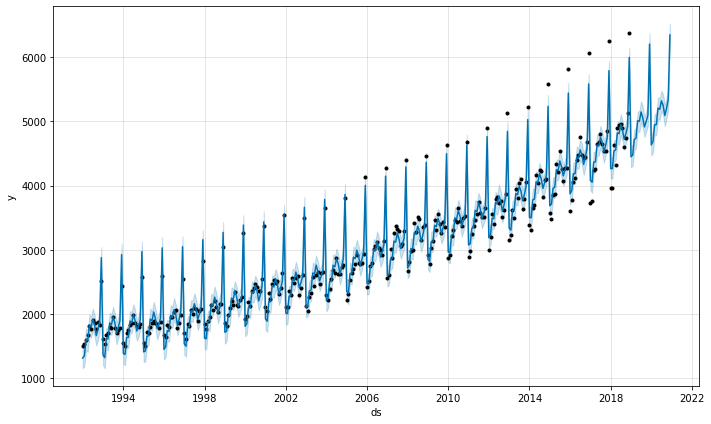

In [25]:
m.plot(forcast);

In [27]:
pd.plotting.register_matplotlib_converters()

(735234.0, 738156.0)

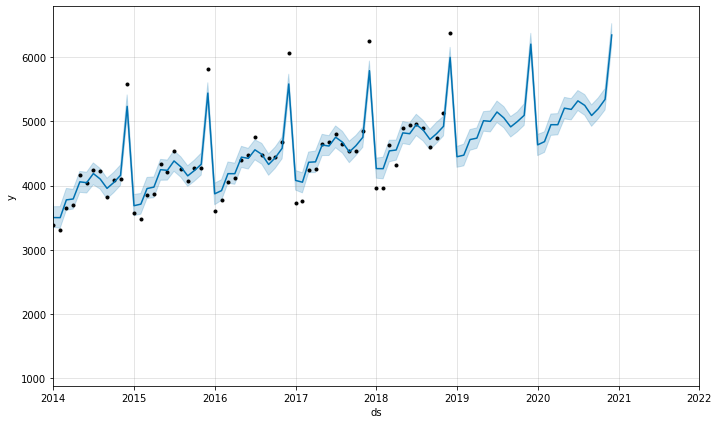

In [28]:
import matplotlib.pyplot as plt
m.plot(forcast)
plt.xlim('2014-01-01','2022-01-01')

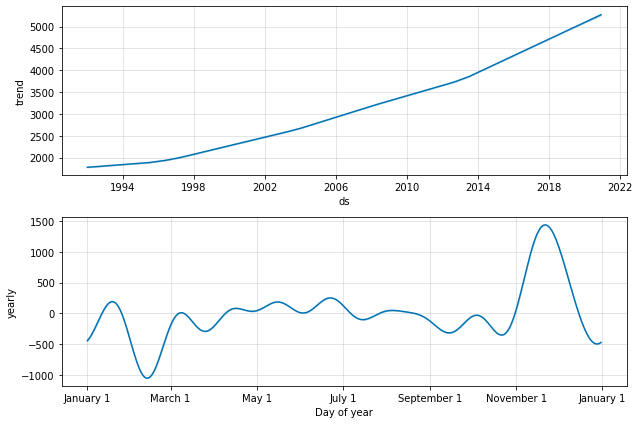

In [29]:
m.plot_components(forcast);